# **Inteligencia Artificial y Aprendizaje Automático**

# **Ejercicios con varios tipos de casos de transformaciones para preparación de datos y modelado.**


Usemos los datos llamados "tips" de Seaborn que contiene factores categóricos y numéricos:

https://github.com/mwaskom/seaborn-data

Cuyas variables son:

*   total_bill: Total de la cuenta en dólares.
*   tip: Propina que se dejó, en dólares.
*   sex: género del que pagó la cuenta.
*   smoker: Si estaban o no en la sección de fumadores.
*   day: Día de la semana.
*   time: Comida del día.
*   size: Total de clientes en la mesa.

La variable a predecir (o variable de salida) es el monto de la propina (tip), con base a la información del resto de las variables de entrada.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [ ]:
tips = sns.load_dataset('tips')
df = pd.DataFrame(tips)   # por facilidad consideremos los datps como un DataFrame de Pandas.
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# **Caso 1: Tratamiento de los datos sin usar Pipelines:**


In [ ]:
# Particionemos los datos en Entrenamiento (Train), Validación (Validation) y Prueba (Test):

Xtrain, Xtv, ytrain, ytv = train_test_split(df[['total_bill','sex','smoker','day','time','size']], df[['tip']],
                                            train_size=0.6, shuffle=True, random_state=11)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, train_size=0.5, shuffle=True)

print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)
print(Xtest.shape, ytest.shape)

(146, 6) (146, 1)
(49, 6) (49, 1)
(49, 6) (49, 1)


### **Analicemos primeramente los datos de entrada:**

Analicemos primero los datos de entrada de entrenamiento.

Puedes investigar la información de sus columnas de muy diversas formas y utilizar esta información para empezar a decidir qué tipo de transformaciones podrías aplicar o qué tipo de variables empezar a descartar por el tipo de información que incluyen.

Veamos algunas formas de obtener informacion (y que obviamente tú puedes conocer y aplicar algunas otras):

In [ ]:
Xtrain.head()

,total_bill,sex,smoker,day,time,size
157,25.00,Female,No,Sun,Dinner,4
66,16.45,Female,No,Sat,Dinner,2
179,34.63,Male,Yes,Sun,Dinner,2
35,24.06,Male,No,Sat,Dinner,3
51,10.29,Female,No,Sun,Dinner,2


In [ ]:
Xtrain.describe(include='all')

,total_bill,sex,smoker,day,time,size
count,146.000000,146,146,146,146,146.000000
unique,NaN,2,2,4,2,NaN
top,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,94,94,49,102,NaN
mean,19.175342,NaN,NaN,NaN,NaN,2.534247
std,8.369886,NaN,NaN,NaN,NaN,0.983760
min,3.070000,NaN,NaN,NaN,NaN,1.000000
25%,12.780000,NaN,NaN,NaN,NaN,2.000000
50%,17.530000,NaN,NaN,NaN,NaN,2.000000
75%,24.075000,NaN,NaN,NaN,NaN,3.000000


In [ ]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 157 to 153
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  146 non-null    float64 
 1   sex         146 non-null    category
 2   smoker      146 non-null    category
 3   day         146 non-null    category
 4   time        146 non-null    category
 5   size        146 non-null    int64   
dtypes: category(4), float64(1), int64(1)
memory usage: 4.6 KB


En particular, una manera de seleccionar los datos numéricos es con base al tipo de dato (Dtype), que en este caso claramente se distinguen entre las categóricas (category) y las numéricas (reales-float64 y enteras-int64).

Sin embargo, hay que tener cuidado cuando se seleccionan los factores de esta manera, porque en ocasiones alguna o algunas variables categóricas pueden estar etiquetadas con valores enteros, aún cuando estrictamente no sea el tipo de dato que le corresponde. Pero en dado caso podríamos seleccionar los datos de diversas formas.

In [ ]:
# Por ejemplo, si desamos seleccionar los datos categóricos:

Xtrain.select_dtypes(include=['category'])

,sex,smoker,day,time
157,Female,No,Sun,Dinner
66,Female,No,Sat,Dinner
179,Male,Yes,Sun,Dinner
35,Male,No,Sat,Dinner
51,Female,No,Sun,Dinner
...,...,...,...,...
81,Male,No,Thur,Lunch
91,Male,No,Fri,Dinner
80,Male,Yes,Thur,Lunch
191,Female,Yes,Thur,Lunch


In [ ]:
# Por simplicidad obtengamos por el momento solamente el nombre de dichas columnas:

Xtrain.select_dtypes(include=['category']).columns

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

In [ ]:
# ... los numéricos flotantes y enteros:

Xtrain.select_dtypes(include=['float64','int64']).columns

Index(['total_bill', 'size'], dtype='object')

In [ ]:
# O bien, podemos seleccionar algunos como complemento de algún tipo de datos.
# En este caso los numéricos como complemento de los categóricos:

Xtrain.select_dtypes(exclude=['category']).columns

Index(['total_bill', 'size'], dtype='object')

In [ ]:
# O bien los categóricos como complemento de los que se tengan de tipo numérico:

Xtrain.select_dtypes(exclude=['float64','int64']).columns

Index(['sex', 'smoker', 'day', 'time'], dtype='object')

Este tipo de selección de fatores por su tipo es muy práctica, sobre todo cuando se tiene una gran cantidad de factores.

Existen obviamente más tipos de datos, pero en dado caso ya sabes cómo identificarlos con la instrucción "info()".

Sin embargo, si la cantidad de columnas no es muy grande, también las podemos seleccionar directamente por el nombre de cada columna:

In [ ]:
Xtrain[['total_bill','size']]  # Tienes que usar dobles corcheas para que lo siga considerando como un DataFrame,
                               # de lo contrario lo considera como otro tipo de dato llamdo "Series".

,total_bill,size
157,25.00,4
66,16.45,2
179,34.63,2
35,24.06,3
51,10.29,2
...,...,...
81,16.66,2
91,22.49,2
80,19.44,2
191,19.81,2


### **Variables numéricas:**

Para las numéricas, de manera general podemos obtener diferentes tipos de gráficos (histogramas, boxplot, dispersión, matriz de correlación):

array([[<AxesSubplot:title={'center':'total_bill'}>,
        <AxesSubplot:title={'center':'size'}>]], dtype=object)

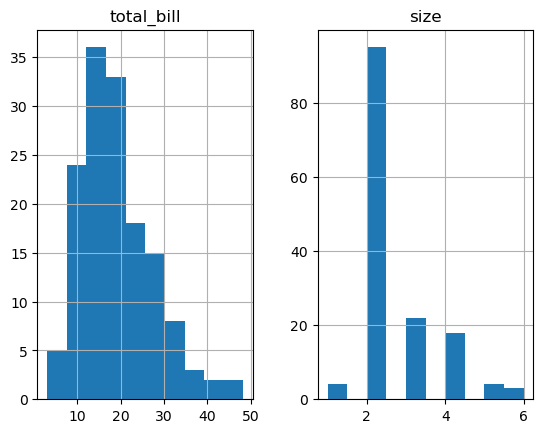

In [ ]:
# Por ejemplo, los histogramas:

Xtrain.hist()

### **Si tenemos, como en este ejemplo, las variables de entrada y la de salida (que también es numérica) separadas y desamos generar el histograma de todas ellas, una manera de proceder podría ser como sigue:**

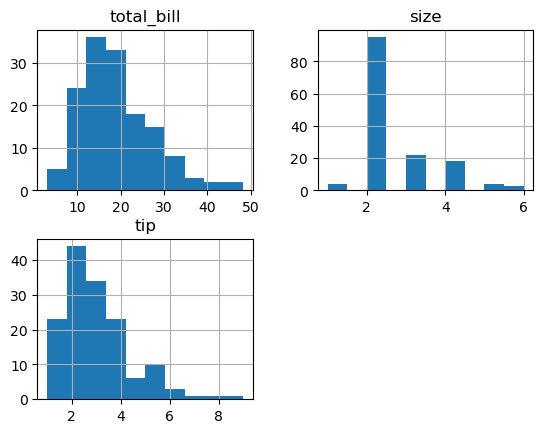

In [ ]:
# Podemos concatenarlas momentáneamente para generar un histograma de todas ellas:

pd.concat([Xtrain,ytrain], axis=0).hist();

Puedes proceder ahora a transformar las variables de entrada por un lado y la de salida por otro, en dado caso.

Por ejemplo, si quisiéramos transformar las variables de entrada mediante la transformación minmax para que ahora estén escaladas en el intervalo [0,1], podríamos proceder como sigue, evitando el filtrado de información (data-leakage):

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()  # Puedes revisar la documentación si deseas modificar alguno de sus argumentos predeterminados.

scaler.fit(Xtrain[['total_bill','size']])  # Ajustamos la transformación a la información de los datos de Train.

MinMaxScaler()

In [ ]:
# Observa que ahora estaremos usando la información de los datos de entrenamiento para transformar los conjuntos
# tanto de entrenamiento mismos, como los de validación y prueba.

# Para este caso podemos ver que ahora tenemos los valores mínimos y máximos de los conjuntos de entranemiento,
# los mismos que obtuviste al hacer al análisis de dicho conjunto al inicio. Sin embargo, observa que estos
# valores mínimos y máximos no necesariamente tienen que ser los de todo el conjunto original.

print(scaler.data_min_)
print(scaler.data_max_)

[3.07 1.  ]
[48.33  6.  ]


In [ ]:
# Y ahora ya podemos transformar los conjuntos.
# Podemos hacer una copia para aplicar las transformaciones:

Xtrain2 = Xtrain.copy()
Xval2 = Xval.copy()
Xtest2 = Xtest.copy()

Xtrain2[['total_bill','size']] =  scaler.transform(Xtrain[['total_bill','size']])
Xval2[['total_bill','size']] =  scaler.transform(Xval[['total_bill','size']])
Xtest2[['total_bill','size']] =  scaler.transform(Xtest[['total_bill','size']])

In [ ]:
# Podemos ver que las variables numéricas han sido transformadas, en cualquiera de estos tres conjuntos
Xval2.head()

,total_bill,sex,smoker,day,time,size
33,0.389306,Female,No,Sat,Dinner,0.6
195,0.099205,Male,No,Thur,Lunch,0.2
39,0.623067,Male,No,Sat,Dinner,0.4
156,0.996465,Male,No,Sun,Dinner,1.0
163,0.237296,Male,No,Sun,Dinner,0.2


En dado caso puedes seguir aplicando las transforamciones que desees, tanto a las variables de entrada, como a la variable de salida.

Por el momento, dejemos las variables numéricas y pasemos a las categóricas.

### **Variables categóricas:**

Con las categóricas puede haber también varias transformaciones a aplicar, dependiendo de si tenemos variables binarias, ordinales o nominales.

Sin embargo, con las categóricas primero debemos verificar la cantidad de niveles que tiene cada una. Esto lo podríamos obtener como sigue:

In [ ]:
Xtrain2['sex'].value_counts()

Male      94
Female    52
Name: sex, dtype: int64

In [ ]:
Xtrain2['smoker'].value_counts()

No     94
Yes    52
Name: smoker, dtype: int64

In [ ]:
Xtrain2['day'].value_counts()

Sat     49
Sun     45
Thur    39
Fri     13
Name: day, dtype: int64

In [ ]:
Xtrain2['time'].value_counts()

Dinner    102
Lunch      44
Name: time, dtype: int64

Vemos que tenemos 3 binarias y 1 nominal.

Transformemos por ejemplo una de ellas:

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
lb = LabelBinarizer()
lb.fit(Xtrain2['sex'])

lb.classes_

array(['Female', 'Male'], dtype='<U6')

In [ ]:
Xtrain2[['sex']] = lb.transform(Xtrain2[['sex']])
Xtrain2

,total_bill,sex,smoker,day,time,size
157,0.484534,0,No,Sun,Dinner,0.6
66,0.295625,0,No,Sat,Dinner,0.2
179,0.697304,1,Yes,Sun,Dinner,0.2
35,0.463765,1,No,Sat,Dinner,0.4
51,0.159523,0,No,Sun,Dinner,0.2
...,...,...,...,...,...,...
81,0.300265,1,No,Thur,Lunch,0.2
91,0.429076,1,No,Fri,Dinner,0.2
80,0.361688,1,Yes,Thur,Lunch,0.2
191,0.369863,0,Yes,Thur,Lunch,0.2


In [ ]:
Xtrain2.info()  # obseva que ahora dicho factor es de tipo entero.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 157 to 153
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  146 non-null    float64 
 1   sex         146 non-null    int32   
 2   smoker      146 non-null    category
 3   day         146 non-null    category
 4   time        146 non-null    category
 5   size        146 non-null    float64 
dtypes: category(3), float64(2), int32(1)
memory usage: 4.9 KB


In [ ]:
# y se procede ahora solamente a transformar las de validación y prueba:
Xval2[['sex']] = lb.transform(Xval2[['sex']])
Xtest2[['sex']] = lb.transform(Xtest2[['sex']])

Recuerda que las variables asociadas al tiempo pueden en dado caso considerarse como ordinales, como en este caso del factor "day".

La transformación de las categóricas podría llevarse a cabo de varias maneras. Veamos algunas de ellas con el factor "day":

In [ ]:
# Podríamos usar la transformación "map" de Python.
# Con base a la información de los niveles del conjunto de entrenamiento podemos definir los niveles.

tmp = Xtrain2.copy()  # hagamos una copia para los ejemplos.

tmp['day'] = tmp['day'].map({'Thur':0, 'Fri':1, 'Sat':2, 'Sun':3})

tmp

,total_bill,sex,smoker,day,time,size
157,0.484534,0,No,3,Dinner,0.6
66,0.295625,0,No,2,Dinner,0.2
179,0.697304,1,Yes,3,Dinner,0.2
35,0.463765,1,No,2,Dinner,0.4
51,0.159523,0,No,3,Dinner,0.2
...,...,...,...,...,...,...
81,0.300265,1,No,0,Lunch,0.2
91,0.429076,1,No,1,Dinner,0.2
80,0.361688,1,Yes,0,Lunch,0.2
191,0.369863,0,Yes,0,Lunch,0.2


In [ ]:
tmp.info()  # observa que aunque la columna "day" tiene valores numéricos, se sigue considerando como categórica:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 157 to 153
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  146 non-null    float64 
 1   sex         146 non-null    int32   
 2   smoker      146 non-null    category
 3   day         146 non-null    category
 4   time        146 non-null    category
 5   size        146 non-null    float64 
dtypes: category(3), float64(2), int32(1)
memory usage: 4.9 KB


En dado caso podríamos incluir el resto de los días como otro nivel, en caso de que pudieran aparecer posteriormente otros de los días de la semana ya sea en el conjunto de entrenamiento o en los conjuntos de validación o prueba. Y en dado caso que no estén dichos casos, tampoco lo afecta:

In [ ]:
tmp = Xtrain2.copy()

tmp['day'] = tmp['day'].map({'Thur':0, 'Fri':1, 'Sat':2, 'Sun':3, 'Mon':4, 'Tue':4, 'Wed':4})


# Y lo mismo aplicarías para los conjuntos de Validación y Prueba directamente,
# con base a lo que decidiste con los de entrenamiento.


In [ ]:
# También se podrían tansformar el factor "day" a variables ordinales mediante OrdinalEncoder() de Sklearn:

from sklearn.preprocessing import OrdinalEncoder

In [ ]:
enc = OrdinalEncoder()

enc.fit(Xtrain2[['day']])   # Ajustemos los datos de entrenamiento con la copia Xtrain2 que teníamos.

OrdinalEncoder()

In [ ]:
enc.categories_  # Vemos que tenemos las categorías que ya habíamos observado previamente.

[array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object)]

In [ ]:
# Y transformamos los datos:

Xtrain2[['day']] = enc.transform(Xtrain2[['day']])

tmp

,total_bill,sex,smoker,day,time,size
157,0.484534,0,No,3,Dinner,0.6
66,0.295625,0,No,2,Dinner,0.2
179,0.697304,1,Yes,3,Dinner,0.2
35,0.463765,1,No,2,Dinner,0.4
51,0.159523,0,No,3,Dinner,0.2
...,...,...,...,...,...,...
81,0.300265,1,No,0,Lunch,0.2
91,0.429076,1,No,1,Dinner,0.2
80,0.361688,1,Yes,0,Lunch,0.2
191,0.369863,0,Yes,0,Lunch,0.2


In [ ]:
Xtrain2.info() # Observa que en este caso el factor "day" es ahora de tipo flotante.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 157 to 153
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  146 non-null    float64 
 1   sex         146 non-null    int32   
 2   smoker      146 non-null    category
 3   day         146 non-null    float64 
 4   time        146 non-null    category
 5   size        146 non-null    float64 
dtypes: category(2), float64(3), int32(1)
memory usage: 5.7 KB


In [ ]:
# Y lo mismo procedes transformando los datos de validación y prueba:
Xval2[['day']] = enc.transform(Xval2[['day']])
Xtest2[['day']] = enc.transform(Xtest2[['day']])

La función OrdinalEncoder() te permite manejar la opción de niveles nuevos que aparezcan en los datos de validación o prueba.

Puedes consultar los ejemplos de la documentación para dichos casos:

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

La transformación LabelEncoder() de Sklearn también permite transformar variables ordinales y en particular las binarias.

A manera de ejemplo supongamos que desamos aplicar LabelEncoder() al factor "time":

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
tmp = Xtrain.copy()  # hagamos una copia para los ejemplos.

le = LabelEncoder()
le.fit(tmp['time'])

le.classes_   # obtenemos de nuevo las clases que ya conocíamos...

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
tmp['time'] = le.transform(tmp['time'])


In [ ]:
tmp

,total_bill,sex,smoker,day,time,size
157,25.00,Female,No,Sun,0,4
66,16.45,Female,No,Sat,0,2
179,34.63,Male,Yes,Sun,0,2
35,24.06,Male,No,Sat,0,3
51,10.29,Female,No,Sun,0,2
...,...,...,...,...,...,...
81,16.66,Male,No,Thur,1,2
91,22.49,Male,No,Fri,0,2
80,19.44,Male,Yes,Thur,1,2
191,19.81,Female,Yes,Thur,1,2


In [ ]:
tmp.info()   # observa que ahora es de tipo entero el factor "time":

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 157 to 153
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  146 non-null    float64 
 1   sex         146 non-null    category
 2   smoker      146 non-null    category
 3   day         146 non-null    category
 4   time        146 non-null    int32   
 5   size        146 non-null    int64   
dtypes: category(3), float64(1), int32(1), int64(1)
memory usage: 4.9 KB


Sin embargo, en las nuevas versiones de Sklearn, se recomienda que LabelEnconder() se utilice solo para la variable de salida y LabelBinarizer() y OrdinalEncoder() para las variables de entrada.

La diferencia principal está en que LabelEncoder() requiere que la variable a transformar sea 1D (como usualmente sucede con la variable de salida), a diferencia del caso LabelEncoder() y OrdinalEncoder() que debe ser 2D (como usualmente sucede con las variables de entrada). Podemos en lo sucesivo seguir esta recomendación.

Sin embargo, independientemente del tipo de dato utilizado, hay que recordar que al utilizar cualquiera de estas transformaciones en una variable ordinal, se le estará dando ahora el tratamiento como numérico dentro de los modelos de aprendizaje automático que se utilicen. Es algo que debes tomar en cuenta al momento de hacer el análisis e interpretación de dichos factores.


Finalmente veamos la manera de transformar variables nominales con 3 o más niveles a variables Dummies (usando Pandas) o One-Hot_Encoder (usando Sklearn).

En dado caso una variable binaria podría también considerarse dentro del caso One-Hot-Encoder/Dummies, como podemos ver en el siguiente ejemplo.

A manera de ejemplo supongamos que a continuación consideramos las variables "smoker" y "day" como Nominales que desamos transformar con Dummies de Pandas o OneHotEncoder de Sklearn:

In [ ]:
Xtrain3 = Xtrain.copy()  # hagamos otras copias para este ejemplo.
Xval3 = Xval.copy()
Xtest3 = Xtest.copy()

nominales = ['smoker','day']

Xtrain3 = pd.get_dummies(Xtrain3, columns=nominales, drop_first=True)
Xval3 = pd.get_dummies(Xval3, columns=nominales, drop_first=True)
Xtest3 = pd.get_dummies(Xtest3, columns=nominales, drop_first=True)

In [ ]:
Xtrain3  # Obseva que la binaria "smoker" igualmente queda ahora etiquetada simplemente con 0s y 1s.

,total_bill,sex,time,size,smoker_No,day_Fri,day_Sat,day_Sun
157,25.00,Female,Dinner,4,1,0,0,1
66,16.45,Female,Dinner,2,1,0,1,0
179,34.63,Male,Dinner,2,0,0,0,1
35,24.06,Male,Dinner,3,1,0,1,0
51,10.29,Female,Dinner,2,1,0,0,1
...,...,...,...,...,...,...,...,...
81,16.66,Male,Lunch,2,1,0,0,0
91,22.49,Male,Dinner,2,1,1,0,0
80,19.44,Male,Lunch,2,0,0,0,0
191,19.81,Female,Lunch,2,0,0,0,0


Recuerda que el argumento drop_first=True, es para que no incluya columnas redundantes.

De manera predeterminada se generan la misma cantidad de columnas que niveles de la variable categórica. En particular por ejemplo con el factor "smoker" se generarían dos columnas, una para el caso "Yes" y otra para el caso "No", lo cual es claro que la información dada por ambas es redundante y solamente se requiere una de dichas columnas para entender si dicha persona fuma o no. Entonces el argumento "drop_first=True" le dice al método que simplemente elimine la primer columna que se generó en el proceso y evitar así la información duplicada. Podemos ver el caso como sigue:

In [ ]:
Xtrain3 = Xtrain.copy()

pd.get_dummies(Xtrain3, columns=nominales, drop_first=False) # En particular observa las columnas "Yes" y "No" de "smoker",
                                                             # una es el complemento de la otra, por lo que no se requiere
                                                             # tener ambas.

,total_bill,sex,time,size,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun
157,25.00,Female,Dinner,4,0,1,0,0,0,1
66,16.45,Female,Dinner,2,0,1,0,0,1,0
179,34.63,Male,Dinner,2,1,0,0,0,0,1
35,24.06,Male,Dinner,3,0,1,0,0,1,0
51,10.29,Female,Dinner,2,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
81,16.66,Male,Lunch,2,0,1,1,0,0,0
91,22.49,Male,Dinner,2,0,1,0,1,0,0
80,19.44,Male,Lunch,2,1,0,1,0,0,0
191,19.81,Female,Lunch,2,1,0,1,0,0,0


### **Caso OneHotEncoder de Sklearn:**

In [ ]:
# Y en el caso de usar OneHotEncoder() de Sklearn veamos cómo quedaría:

from sklearn.preprocessing import OneHotEncoder

In [ ]:
Xtrain.columns

Index(['total_bill', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [ ]:
# Debemos separar primero las columnas a procesar con OHE y el resto:
# Supongamos que solamente estas dos columnas son las que deseamos aplicar OHE:

nominales = ['smoker','day']
Xtrainnom = Xtrain[nominales]

elresto = ['total_bill','sex','time','size']
Xtrainelresto = Xtrain[elresto]

enc = OneHotEncoder(sparse=False, handle_unknown='error', drop='first')  # en algunas versiones de Python es sparse_output

enc.fit(Xtrainnom)  # ajustamos con los datos de entranemiento y de las columnas nominales seleccionadas.

enc.categories_

[array(['No', 'Yes'], dtype=object),
 array(['Fri', 'Sat', 'Sun', 'Thur'], dtype=object)]

In [ ]:
Xtrainohe = enc.transform(Xtrainnom)  # Ya están las transformaciones, sin embargo observamos que se perdieron los nombres
Xtrainohe                        # de las columnas, además de que ya no es un DataFrame de Pandas.
                            # No siempre se requiere reconstruirlo como DataFrame, pero en ocasiones es útil
                            # para el análisis de lo que se va generando. Veamos cómo reconostruirla.

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],


In [ ]:
categorical_columns = []

for i, col in enumerate(Xtrainnom.columns):   # recuperamos los nombres de las columnas originales: smoker y day en este caso.
  for j, cat in enumerate(enc.categories_[i]):    # recuperamos cada uno de los niveles de cada columna.
    if j in enc.drop_idx_ :    # nos brincamos el índice del nivel que estamos eliminando.
        continue
    categorical_columns.append(f'{col}_{cat}')  # generamos los nombres de las nuevas columnas.

categorical_columns

['smoker_Yes', 'day_Sat', 'day_Sun', 'day_Thur']

In [ ]:
# Y las nuevas columnas con OHE generadas quedarían como el siguiente DataFrame:

Xtrainohedf = pd.DataFrame(Xtrainohe, columns=categorical_columns, index=Xtrainnom.index)
Xtrainohedf

,smoker_Yes,day_Sat,day_Sun,day_Thur
157,0.0,0.0,1.0,0.0
66,0.0,1.0,0.0,0.0
179,1.0,0.0,1.0,0.0
35,0.0,1.0,0.0,0.0
51,0.0,0.0,1.0,0.0
...,...,...,...,...
81,0.0,0.0,0.0,1.0
91,0.0,0.0,0.0,0.0
80,1.0,0.0,0.0,1.0
191,1.0,0.0,0.0,1.0


In [ ]:
# Y podemos conjuntarlas de nuevo con el resto de los factores:

Xtrainnew = Xtrainelresto.join(Xtrainohedf)
Xtrainnew

,total_bill,sex,time,size,smoker_Yes,day_Sat,day_Sun,day_Thur
157,25.00,Female,Dinner,4,0.0,0.0,1.0,0.0
66,16.45,Female,Dinner,2,0.0,1.0,0.0,0.0
179,34.63,Male,Dinner,2,1.0,0.0,1.0,0.0
35,24.06,Male,Dinner,3,0.0,1.0,0.0,0.0
51,10.29,Female,Dinner,2,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
81,16.66,Male,Lunch,2,0.0,0.0,0.0,1.0
91,22.49,Male,Dinner,2,0.0,0.0,0.0,0.0
80,19.44,Male,Lunch,2,1.0,0.0,0.0,1.0
191,19.81,Female,Lunch,2,1.0,0.0,0.0,1.0


In [ ]:
# Y se procedería de manera análoga con los conjuntos de validación y prueba:

Xvalnom = Xval[nominales]
Xvalelresto = Xval[elresto]
Xvalohe = enc.transform(Xvalnom)

# ... etc...

Puedes ver la documentación para el manejo del caso con niveles desconocidos o para eliminar algún nivel particular diferente al caso "drop=first":

https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html



# Caso 2: Tratamiento de los datos usando Pipelines:

En ocasiones se pueden encapsular varias transformaciones y aplicarlas de manera conjunta mediante la clase Pipeline de Sklearn.

Esta técnica puede ser bastante práctica, sobre todo cuando tenemos una gran cantidad de factores o transformaciones a aplicar.

Veamos algunos ejemplos con el mismo conjunto de datos de las propinas "tips".

Cargaremos de nuevo los datos para evitar cualquier traslape de transformaciones con lo realizado previamente.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

In [ ]:
tips = sns.load_dataset('tips')
df = pd.DataFrame(tips)   # por facilidad consideremos los datps como un DataFrame de Pandas.
df

Xtrain, Xtv, ytrain, ytv = train_test_split(df[['total_bill','sex','smoker','day','time','size']], df[['tip']],
                                            train_size=0.6, shuffle=True, random_state=1)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, train_size=0.5, shuffle=True, random_state=0)

print(Xtrain.shape, ytrain.shape)
print(Xval.shape, yval.shape)
print(Xtest.shape, ytest.shape)

(146, 6) (146, 1)
(49, 6) (49, 1)
(49, 6) (49, 1)


In [ ]:
Xtrain.head(3)

,total_bill,sex,smoker,day,time,size
197,43.11,Female,Yes,Thur,Lunch,4
66,16.45,Female,No,Sat,Dinner,2
70,12.02,Male,No,Sat,Dinner,2


In [ ]:
# Separemos variables numéricas y categóricas.
# Supongamos que las separamos como se indica a continuación.
# Por simplicidad aplicaremos OHE a todas las categóricas:

num_pipe = ['total_bill','size']
cat_pipe = ['sex','smoker','day','time']

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

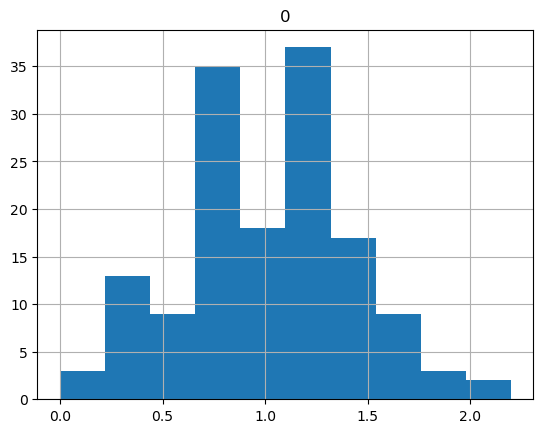

In [ ]:
yy = pd.DataFrame(np.log(ytrain.values)) # podríamos aplicar una transformación logarítmica a la variable de salida.
yy.hist()

In [ ]:
# Podemos definir ahora todas las transformaciones que deseamos aplicar con cada una de estas variables.

# Supongamos que también incluimos la imutación con la Mediana para posibles datos perdidos numéricos:
num_pipe = Pipeline(steps = [('impMed', SimpleImputer(strategy='median')),
                             ('minMax', MinMaxScaler())
                             ])

# Si aplicas directo el Pipeline o el ColumnTransformer, debes usar los índices directamente y no la lista de nombres.
# Por ejemplo, en el caso de las numéricas queremos las columnas de "total_bill" y "size", que son las
# columnas 0 y 5 del DataFrame:
num_pipe_nombres = Xtrain.select_dtypes(include=['float64','int64']).columns  # Es decir: [0,5]
# Si utilizas el Pipeline a través un cross_validate() o cross_val_score(), puedes utilizar
# en dado caso también la lista de los nombres-string como sigue:
#num_pipe_nombres = num_pipe

# Como queremos usar la clase Pipeline de Sklearn, debemos usar entonces OneHotEncoder() de Sklearn.
# Y para posibles datos perdidos usemos ahora la moda, o dato más frecuente:
cat_pipe = Pipeline(steps = [('impMod', SimpleImputer(strategy='most_frequent')),
                             ('catohe', OneHotEncoder(sparse=False, drop='first'))
                            ])

cat_pipe_nombres = Xtrain.select_dtypes(include=['category']).columns # Es decir: [1,2,3,4]
#cat_pipe_nombres = cat_pipe  # En caso de que uses la lista de nombres-strings

# Y ahora conjuntamos todas las transformaciones:
columnasTransformer = ColumnTransformer(transformers = [('numpipe', num_pipe, num_pipe_nombres),
                                                        ('catpipe', cat_pipe, cat_pipe_nombres)
                                                       ],
                                        remainder='passthrough'   # si hubiera más varaibles que no queremos procesar.
                                       )

In [ ]:
# Ajustamos (fit) las transformaciones al conjunto de entrenamiento:
XtrainFit = columnasTransformer.fit(Xtrain)   # Generamos la información necesaria con el conjunto de entrenamiento.

# Y ahora las aplicamos (transformer) a cada conjunto para evitar el data-leakage:
XtrainPT = XtrainFit.transform(Xtrain)
XvalPT  =  XtrainFit.transform(Xval)
XtestPT  =  XtrainFit.transform(Xtest)

La variable de salida también puede incluirse en el Pipeline, pero en este primer caso y por simplicidad la dejaremos afuera, por lo que debemos transformarla directamente con la función logaritmo.

Y ahora puedes aplicar los modelos a dichas variables transformadas. Por ejemplo la Regresión Lineal:

In [ ]:
modeloRL = LinearRegression()

modeloRL.fit(XtrainPT, np.ravel(np.log(ytrain)))

# Y podemos obtener el coeficiente de determinación:
print(modeloRL.score(XtrainPT,np.log(ytrain)))
print(modeloRL.score(XvalPT, np.log(yval)))

0.5086834589513021
0.4798479548323735


En particular este problema de "tips" es conocido como un problema con un alto porcentaje de no linealidad.

Observa que estos conjuntos no son DataFrames y en dado caso que desees visualizarlas tendrías que reconstruirlas como lo vimos previamente.

En particular, si deseamos obtener con este modelo cuál sería la propina que dejan en un servicio con un total de $20 dólares, de 2 personas, en una comida de Sábado, en área de no fumadores y la cuenta pagada por una persona de género masculino:


In [ ]:
servicio = pd.DataFrame(np.array([20., 'Male', 'No', 'Sat','Dinner', 2]).reshape(1,-1))
servicio.columns = Xtrain.columns
servicio

,total_bill,sex,smoker,day,time,size
0,20.0,Male,No,Sat,Dinner,2


In [ ]:
tmp = XtrainFit.transform(servicio)
modeloRL.predict(tmp)[0]

0.9868363167827331

La predicción en este caso es de una propina de $0.99 centavos de dólar.

>> Fin de los ejercicios